/tmp/ipykernel_233858/4280148091.py:28: RuntimeWarning: overflow encountered in exp
  if np.random.rand() < np.exp((potential(x_new, q) + metadynamics_bias(x_new, step * bias_params['bias_interval'], bias_params['bias_width'], bias_params['bias_height'])) - total_potential) / temperature:


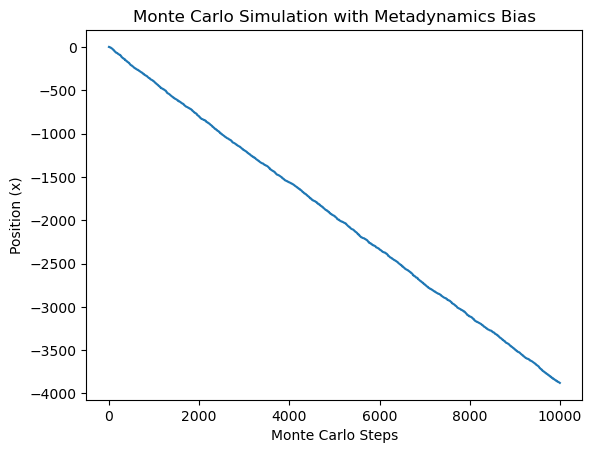

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Potential function
def potential(x, q):
    return q * (x**2 - 1)**2

# Metadynamics bias potential
def metadynamics_bias(x, t, width, height):
    return height * np.exp(-(x - t)**2 / (2 * width**2))

# Monte Carlo simulation
def monte_carlo_simulation(steps, temperature, q, bias_params):
    positions = []
    x = 0.0  # Initial position

    for step in range(steps):
        # Metadynamics bias potential
        bias_potential = metadynamics_bias(x, step * bias_params['bias_interval'], bias_params['bias_width'], bias_params['bias_height'])

        # Calculate total potential with bias
        total_potential = potential(x, q) + bias_potential

        # Monte Carlo move
        x_new = x + np.random.normal(scale=np.sqrt(temperature))

        # Metropolis acceptance criterion
        if np.random.rand() < np.exp((potential(x_new, q) + metadynamics_bias(x_new, step * bias_params['bias_interval'], bias_params['bias_width'], bias_params['bias_height'])) - total_potential) / temperature:
            x = x_new

        # Record position
        positions.append(x)

    return positions

# Simulation parameters
steps = 10000
temperature = 1.0
q = 1.0

# Metadynamics bias parameters
bias_params = {'bias_interval': 100, 'bias_width': 0.1, 'bias_height': 1.0}

# Run Monte Carlo simulation
positions = monte_carlo_simulation(steps, temperature, q, bias_params)

# Plot position as a function of Monte Carlo steps
plt.plot(np.arange(steps), positions)
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Position (x)')
plt.title('Monte Carlo Simulation with Metadynamics Bias')
plt.show()
